In [1]:
#import python libraries for dataset analysis

#Primary data structure library
import pandas as pd

#For scientific computing in python
import numpy as np

#For plotting data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

#For data visualization
import seaborn as sns

#For heat map visualization
import folium

In [2]:
#Using pandas libary and function to read csv file of Singapore Airbnb dataset from http://insideairbnb.com/get-the-data.html
#Save the csv file on the same directory with the notebook file as 'listings_sum.csv'
#Open the csv file

airbnb = pd.read_csv('listings_sum.csv')
airbnb.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     85   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     80   
2        North Region     Woodlands   1.44246  103.79667  Private room     71   
3         East Region      Tampines   1.34541  103.95712  Private room    171   
4         East Region      Tampines   1.34567  103.95963  Private room     97   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.25   
2               6                 20  2015-10-01               0.19   
3              90                 20  2020-01-17               0.20   
4              90                 24  2019-10-13               0.23   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               8               365  
4                               8               365

In [3]:
#look for information on how big is our dataset

airbnb.shape

(7395, 16)

In [4]:
#check all the data type of every column

airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
#Examining the unique values of the 'neighbourhood_group' for later analysis

airbnb['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [6]:
#Examining the unique values of the 'neighbourhood' for later analysis

airbnb['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Queenstown', 'Downtown Core', 'Marine Parade',
       'Pasir Ris', 'Toa Payoh', 'Outram', 'Punggol', 'Tanglin',
       'Kallang', 'Hougang', 'Novena', 'Singapore River', 'Orchard',
       'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Choa Chu Kang',
       'Sembawang', 'Clementi', 'Bukit Panjang', 'Jurong East',
       'Sengkang', 'Bishan', 'Central Water Catchment', 'Yishun',
       'Mandai', 'Southern Islands', 'Western Water Catchment', 'Tuas',
       'Sungei Kadut', 'Pioneer', 'Marina South'], dtype=object)

In [7]:
#Examining the unique values of the 'room_type' for later analysis

airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
#Checking column with missing values

airbnb.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2819
reviews_per_month                 2819
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
#dropping columns that are not significant or could be unethical to use for further data exploration analysis

airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.head()

name  host_id neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763        North Region   
1      Pleasant Room along Bukit Timah   227796      Central Region   
2                          COZICOMFORT   266763        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO   367042         East Region   
4      B&B  Room 1 near Airport & EXPO   367042         East Region   

  neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0     Woodlands   1.44255  103.79580  Private room     85             180   
1   Bukit Timah   1.33235  103.78521  Private room     80              90   
2     Woodlands   1.44246  103.79667  Private room     71               6   
3      Tampines   1.34541  103.95712  Private room    171              90   
4      Tampines   1.34567  103.95963  Private room     97              90   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  1               0.01                               2   
1                 18               0.25                               1   
2                 20               0.19                               2   
3                 20               0.20                               8   
4                 24               0.23                               8   

   availability_365  
0               365  
1               365  
2               365  
3               365  
4               365

In [10]:
#Replacing all the missing values in the 'review_per_month' column with 0

airbnb['reviews_per_month'].fillna(0,inplace=True)

In [11]:
#Exploring and visualizing data

In [12]:
#Skip the first column of 'name' and begin from 'host_id' column. Then we slice the top 10 host in terms of listing count

top_host_id = airbnb['host_id'].value_counts().head(10)

[Text(0, 0, '66406177'),
 Text(0, 0, '209913841'),
 Text(0, 0, '8492007'),
 Text(0, 0, '2413412'),
 Text(0, 0, '108773366'),
 Text(0, 0, '156409670'),
 Text(0, 0, '138649185'),
 Text(0, 0, '29420853'),
 Text(0, 0, '219550151'),
 Text(0, 0, '8948251')]

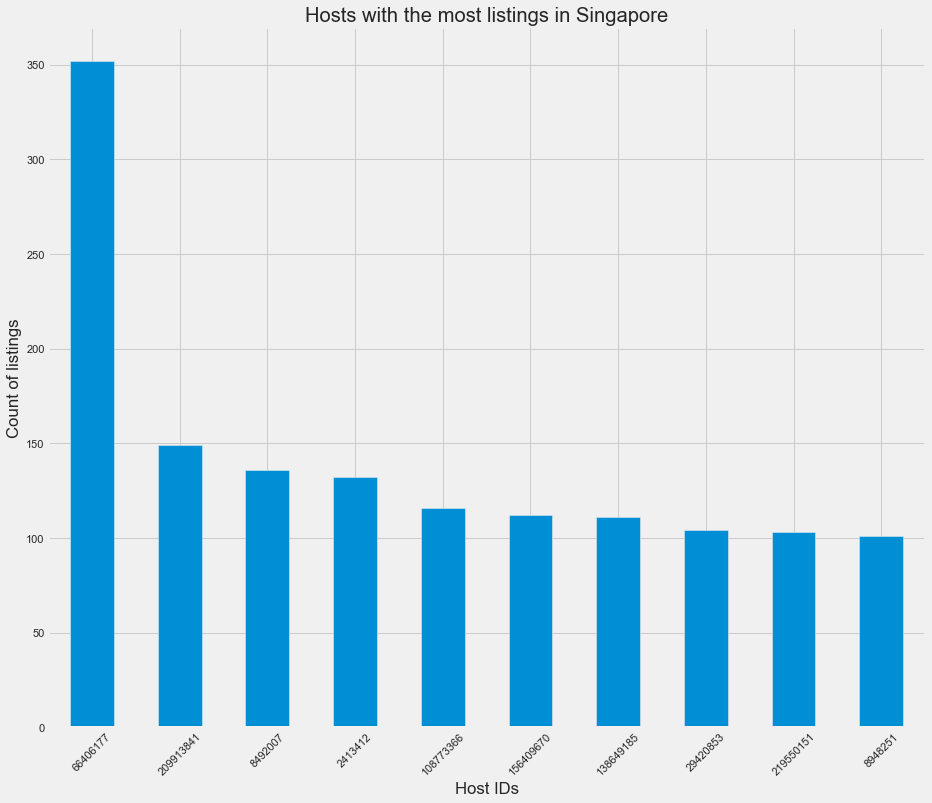

In [13]:
#Setting figure size setting for data visualizations plot

sns.set(rc={'figure.figsize':(14,12)})

plt.style.use('fivethirtyeight')

viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Singapore')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


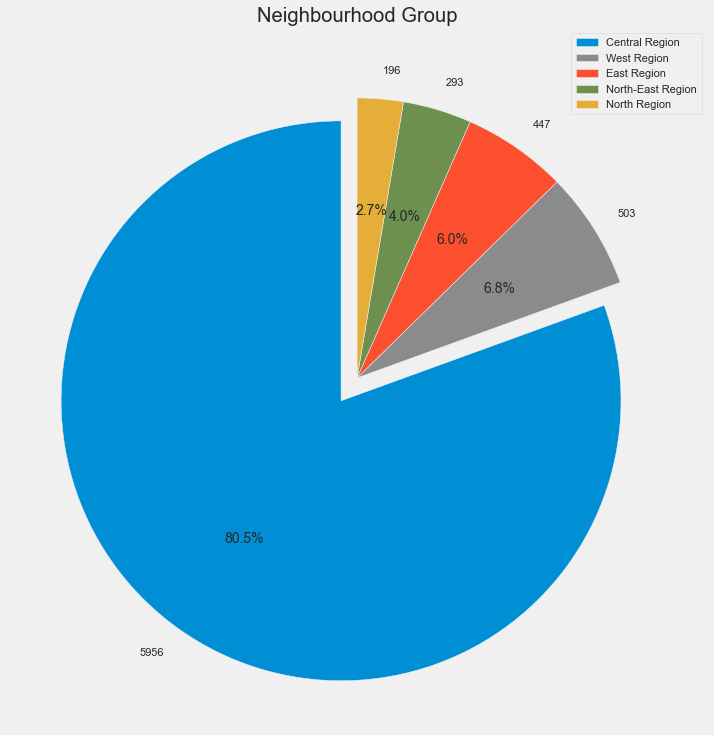

In [14]:
# Top Region Area

labels = airbnb.neighbourhood_group.value_counts().index
colors = ['#008fd5','#8b8b8b','#fc4f30','#6d904f','#e5ae38']
explode = (0.1,0,0,0,0)

shape = airbnb.neighbourhood_group.value_counts().values

plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [15]:
#Finding out top 10 neighboourhoods that have the most listings in them

airbnb.neighbourhood.value_counts().head(10)

Kallang          1088
Geylang           804
Novena            524
Rochor            498
Downtown Core     497
Outram            467
River Valley      366
Bukit Merah       352
Bedok             321
Queenstown        243
Name: neighbourhood, dtype: int64

In [16]:
#Listing Map

test_a = airbnb.loc[:,['longitude','latitude']]
test_a.describe()

longitude     latitude
count  7395.000000  7395.000000
mean    103.847760     1.313785
std       0.042509     0.030900
min     103.646560     1.243870
25%     103.837410     1.295755
50%     103.849310     1.310950
75%     103.865160     1.322315
max     103.971710     1.454590

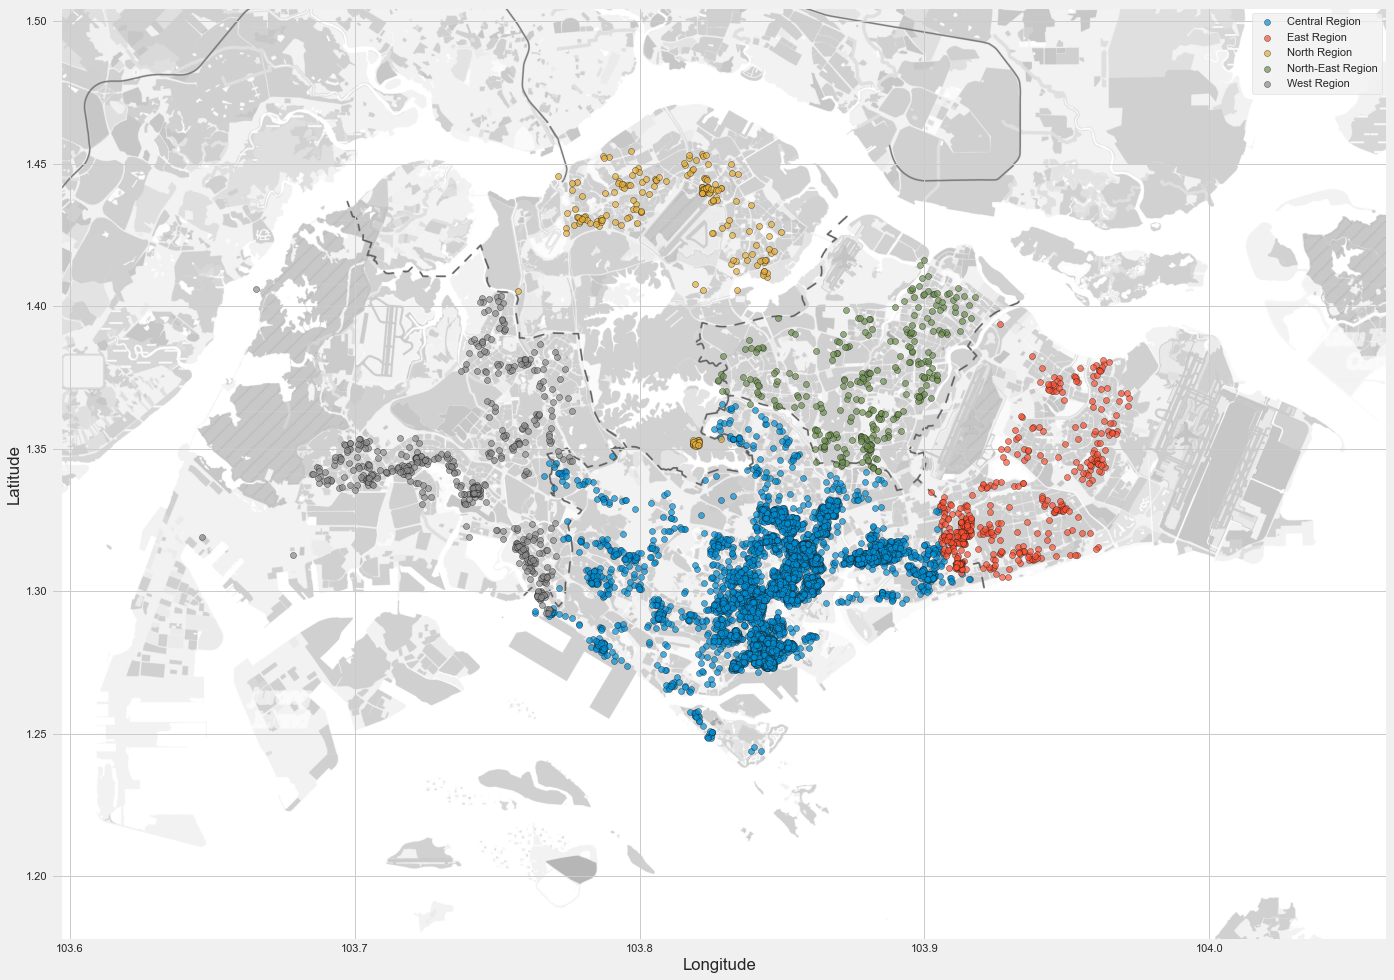

In [17]:
#Visualize the scatter plot of each listing

plt.figure(figsize=(24,16))

BBox = (103.5935, 104.0625, 1.1775, 1.5050)

plt.style.use('fivethirtyeight')

#map_bnw_big.png use manual editing of exported blank singapore map from www.openstreetmap.org using BBox coordinates as the plot boundary
#Save the png file on the same directory with the notebook file as 'map_bnw_big.png'

sg_map = plt.imread('map_bnw_big.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()

groups = airbnb.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.7, edgecolors='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()


In [33]:
#Use folium heat map to visualize listing density

import folium
from folium.plugins import HeatMap

#Folium coordinates derived from approximation of whole Singapore map coordinates
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.3)

HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

In [19]:
#Price Map

#Removed outlier data as some data price have value far from the IQR (interquartile range) value

airbnb_1 = airbnb[airbnb.price < 300]

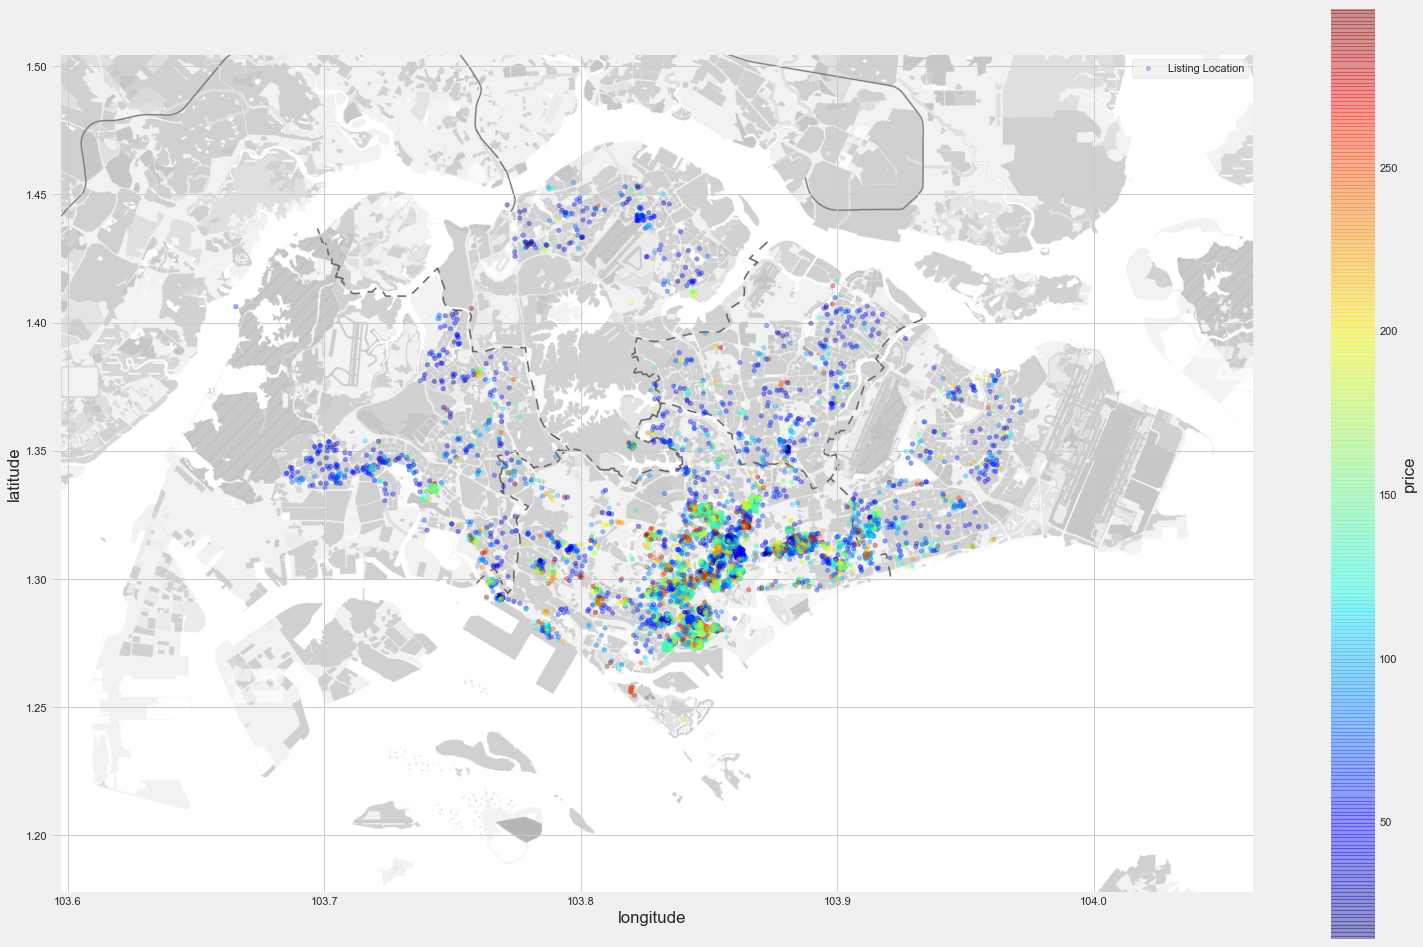

In [20]:
#Visualize the scatter plot with price heat map

plt.figure(figsize=(24,16))

sg_map = plt.imread('map_bnw_big.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()

airbnb_1.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

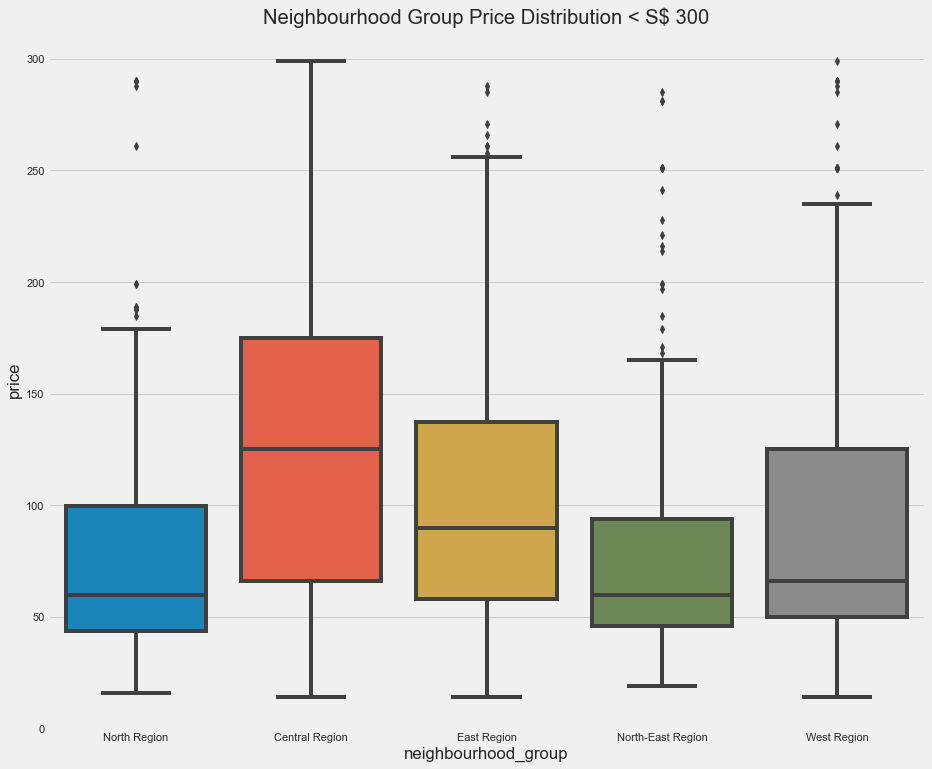

In [21]:
#Visualize Price Distribution based on neighboorhood group

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = airbnb_1)
plt.title('Neighbourhood Group Price Distribution < S$ 300')
plt.show()

In [22]:
#Find out highest average price on each neighbourhood

airbnb_1.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Sungei Kadut               290.000000
Southern Islands           260.500000
Downtown Core              156.200472
Novena                     154.676892
Central Water Catchment    147.826087
Museum                     147.603448
Orchard                    143.562500
Geylang                    140.857527
Tanglin                    139.929078
Rochor                     133.981859
Queenstown                 133.799127
River Valley               132.726154
Newton                     131.600000
Marine Parade              122.423729
Jurong East                121.890244
Toa Payoh                  117.762712
Bukit Merah                115.879365
Bedok                      111.707792
Kallang                    110.692233
Clementi                   110.529412
Outram                     106.700696
Bukit Timah                103.716981
Singapore River            101.772152
Bishan                      90.326923
Serangoon                   88.593750
Bukit Batok                 88.10204

In [23]:
#Find out the top 25 used words for listing names
#Create empty list where we are going to put the name strings

names=[]


#Getting name string from 'name' column and appending it to the empty list

for name in airbnb.name:
    names.append(name)

    
#Setting a function to split name strings into seperate words

def split_name(name):
    s = str(name).split()
    return s


#Create empty list where we are going to count the words

names_count = []


#Getting name string to appending it to the list above

for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)
        

In [24]:
#import counter library to count and see the top 25 words used by host

from collections import Counter

top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

[Text(0, 0, 'room'),
 Text(0, 0, 'mrt'),
 Text(0, 0, 'in'),
 Text(0, 0, 'near'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, '@'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'to'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'private'),
 Text(0, 0, '2'),
 Text(0, 0, 'with'),
 Text(0, 0, 'for'),
 Text(0, 0, 'city'),
 Text(0, 0, '1'),
 Text(0, 0, 'condo'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'cosy'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, '2br'),
 Text(0, 0, '3'),
 Text(0, 0, 'central')]

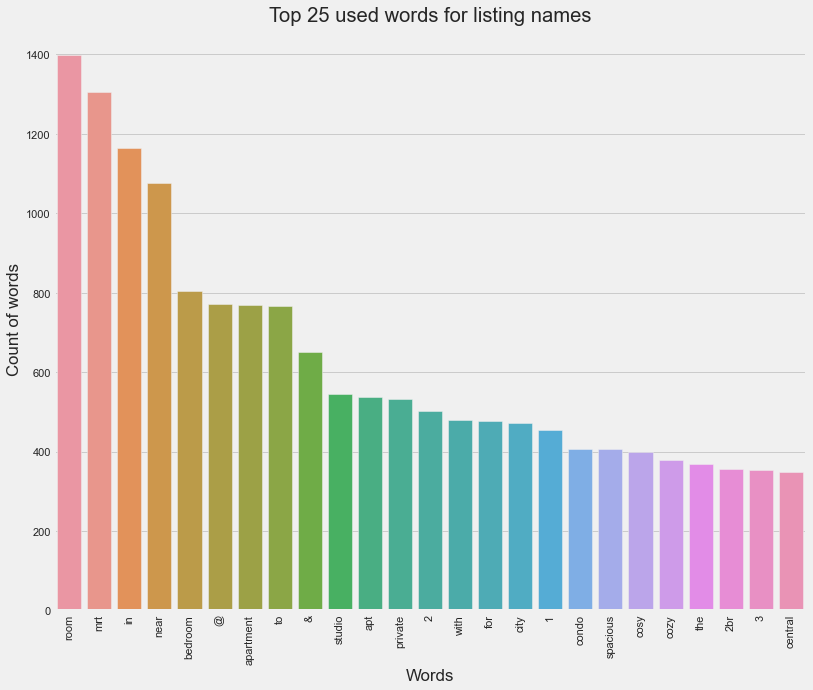

In [25]:
#Visualize our findings and convert it to DataFrame

plt.figure(figsize=(12,10))

word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)

viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

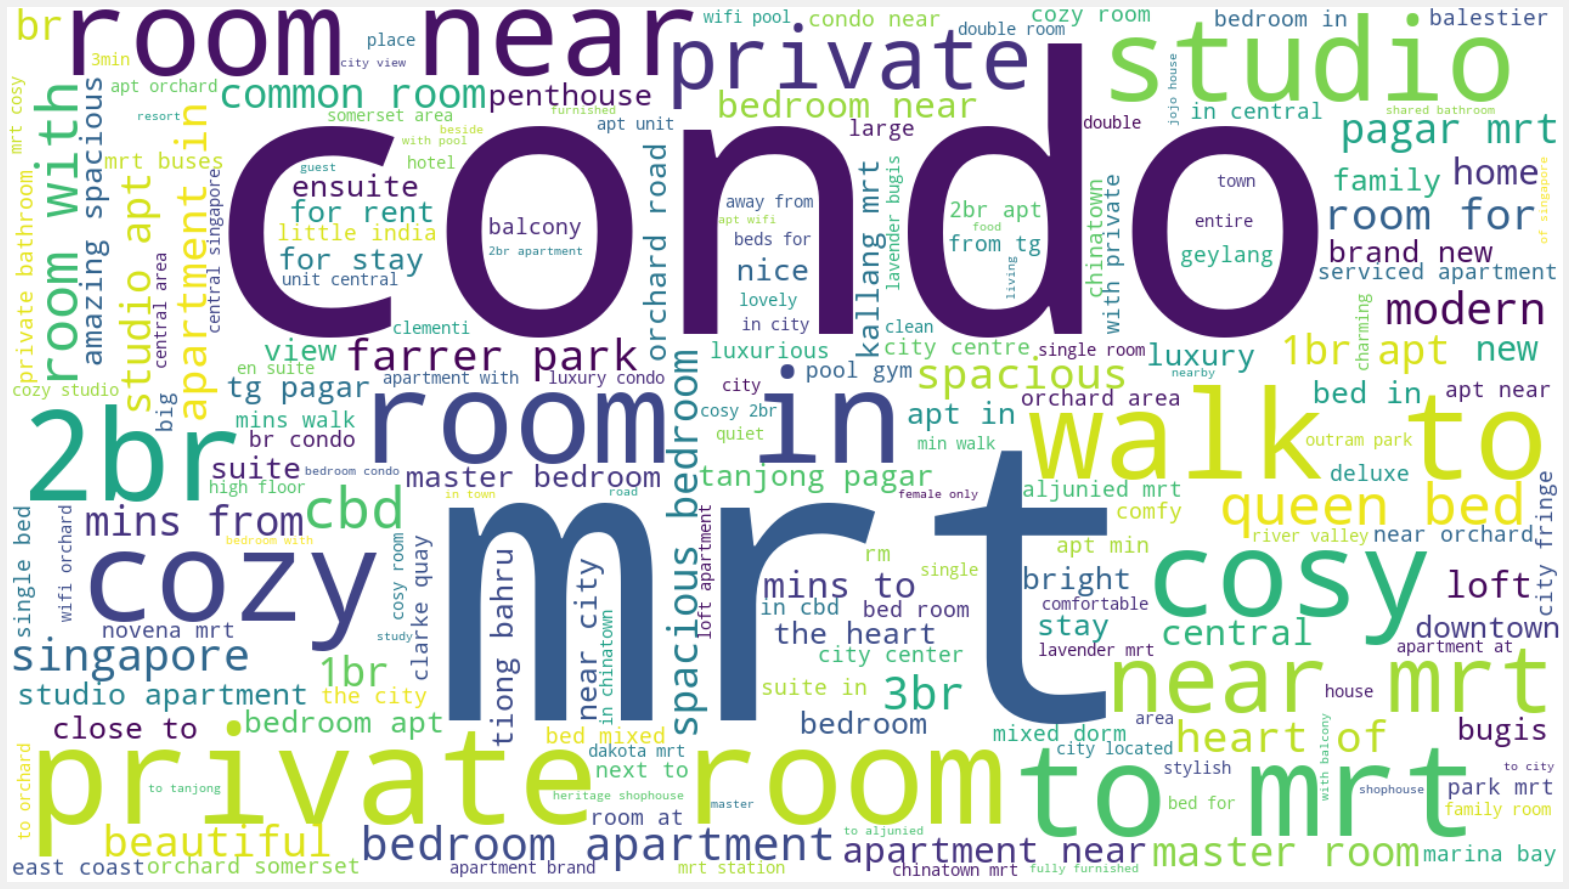

In [26]:
#Visualize most used keywords for listing name using word cloud image

from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n).lower() for n in airbnb.name)

#Create and generate word cloud image
wordcloud = WordCloud(max_words=200, background_color = 'white', width = 1280, height=720).generate(text)
plt.figure(figsize=(25,15))

#Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#Group room type for each region

airbnb_types=airbnb.groupby(['neighbourhood_group', 'room_type']).size()
airbnb_types

neighbourhood_group  room_type      
Central Region       Entire home/apt    3152
                     Hotel room          467
                     Private room       2114
                     Shared room         223
East Region          Entire home/apt     105
                     Hotel room            6
                     Private room        326
                     Shared room          10
North Region         Entire home/apt      34
                     Private room        150
                     Shared room          12
North-East Region    Entire home/apt      56
                     Hotel room            3
                     Private room        226
                     Shared room           8
West Region          Entire home/apt     148
                     Hotel room            4
                     Private room        335
                     Shared room          16
dtype: int64

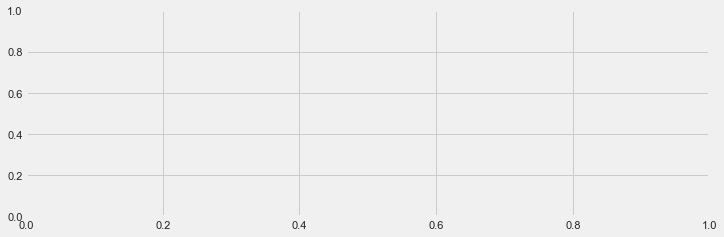

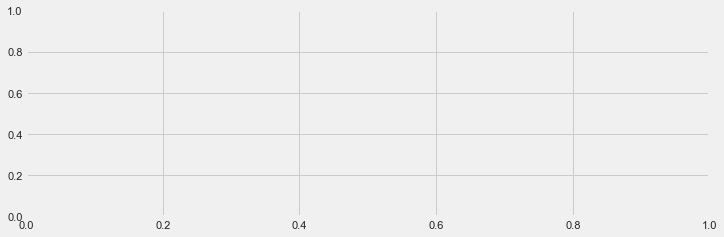

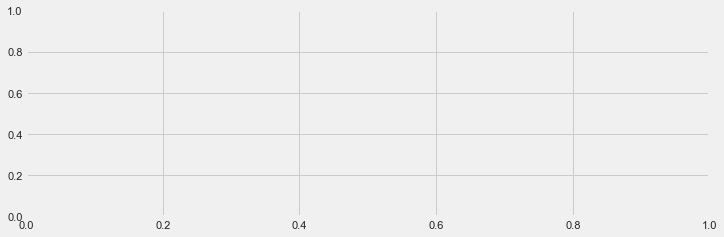

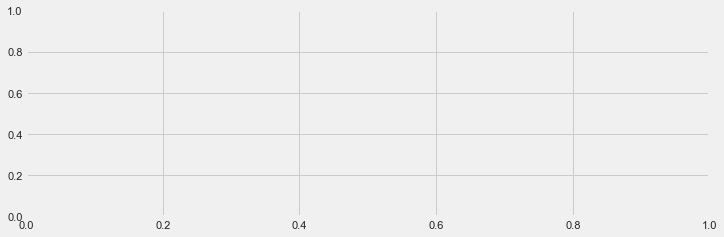

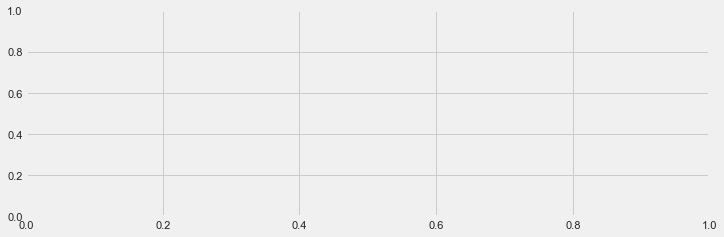

In [29]:
import plotly.offline as pyo
import plotly.graph_objs as go

#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }

#Empty string for number of title
num = 0

#Create function to plot room type proportion on all region area
for region in airbnb.neighbourhood_group.unique():
    
    plt.figure(figsize=(24,12))
    
    reg = airbnb_types.index[4*num][0]
    
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = reg, marker=dict(colors=colors, line=dict(color='#FFFFFF', width=5)))
    reg_ch.show()
    
    
    plot_num += 1
    

In [31]:
#Top 10 most reviewed listing in Singapore

top_review = airbnb.nlargest(10, 'number_of_reviews')
top_review

name   host_id  \
117                  Luxuriously Spacious Studio Apt.   7642747   
997                  Spacious room near Woodleigh MRT  44793532   
125   Heritage Shophouse Right in Epicentre of Sights   1346787   
566                Clean cosy room, 7 mins to Sentosa  34333799   
219                                     Central Haven  21313007   
381                                     The Lily Room  30080617   
380                             The Private Sanctuary  30080617   
598                1 Super Single Bed In Private Room  40912923   
341                                 S5 @ City Central  25116861   
1201             Bright & Airy, Safari-Colonial Loft!  17032962   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
117          East Region         Bedok   1.32122  103.91492  Entire home/apt   
997       Central Region     Toa Payoh   1.33514  103.87622     Private room   
125       Central Region        Outram   1.28448  103.84360     Private room   
566       Central Region   Bukit Merah   1.27718  103.82167     Private room   
219       Central Region       Tanglin   1.29312  103.82979  Entire home/apt   
381          East Region      Tampines   1.34463  103.96107     Private room   
380          East Region      Tampines   1.34495  103.96043     Private room   
598       Central Region       Geylang   1.31422  103.90481     Private room   
341       Central Region        Rochor   1.30386  103.85459  Entire home/apt   
1201      Central Region        Rochor   1.31225  103.85431  Entire home/apt   

      price  minimum_nights  number_of_reviews  reviews_per_month  \
117     140               2                370               4.84   
997      48               1                354               7.00   
125      90               1                336               5.21   
566      73               3                322               5.74   
219     218               2                312               4.65   
381      60              30                296               4.83   
380      70              90                285               4.69   
598      40               1                285               5.02   
341     108               2                283               4.50   
1201    152               2                268               5.52   

      calculated_host_listings_count  availability_365  
117                                1               287  
997                                2                94  
125                                3               354  
566                                1               239  
219                                1               320  
381                                7               180  
380                                7               365  
598                                4                 0  
341                               10                53  
1201                              16               176

In [32]:
#Average price per night of top 10 most reviewed listings

price_avg = top_review.price.mean()
print('Average price per night: S$ {}'.format(price_avg))

Average price per night: S$ 99.9
